#### Features/Column Description :-

1) X1 - Relative Compactness<br>
2) X2 - Surface Area<br>
3) X3 - Wall Area<br>
4) X4 - Roof Area<br>
5) X5 - Overall Height<br>
6) X6 - Orientation<br>
7) X7 - Glazing Area<br>
8) X8 - Glazing Area Distrbution<br>
9) Y1 - Heating Load<br>
10) Y2 - Cooling Load


<b>Regression Task</b><br>
Use the given dataset and perform the following:-
<ol>
<li> Read the 'heat_load.xlsx' dataset.</li>
<li> Rename the columns as per the given features</li> 
<li> Remove/handle null values if any</li>    
<li> Considering all the features as independent features (except heating and cooling load) Split the dataset into training and test dataset with test_size = 25%</li>
<li> Predict the Heating load based on features from X1 to X8 and also calculate
the model score. Also find the intercept and the coefficients corresponding to
each of these features. Generate equation of Linear regression</li>
<li>Predict the Cooling load based on features from X1 to X8 and also calculate
the model score. Also find the intercept and the coefficients corresponding 
to each of these features. Generate equation of Linear regression</li>
<li> Compute MSE, MAE, RMSE for two scenarios(5 and 6)</li> 
<li>Select appropriate independent features based on Correlation matrix</li>
<li>Repeat Q5 and Q7 for heating load after the original dataset has been split into training and testing dataset with test_szie=25% with appropriate independent features selected from correlation matrix</li>
<li>Repeat Q6 and Q7 for cooling load after the original dataset has been split into training and testing dataset with test_szie=25% with appropriate independent features selected from correlation matrix</li>   
</ol>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/heat_load.xlsx')

In [ ]:
df

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
df.rename(columns={'X1':'Relative Compactness','X2':'Surface Area','X3' :'Wall Area','X4' :'Roof Area','X5':'Overall Height',
                   'X6':'Orientation','X7':'Glazing Area','X8':'Glazing Area Distrbution',
                   'Y1':'Heating Load','Y2' : 'Cooling Load'},inplace=True)

In [ ]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [ ]:
df.isnull().sum()

Relative Compactness        0
Surface Area                0
Wall Area                   0
Roof Area                   0
Overall Height              0
Orientation                 0
Glazing Area                0
Glazing Area Distrbution    0
Heating Load                0
Cooling Load                0
dtype: int64

In [ ]:
x = df.iloc[:,:-2]
y = df.iloc[:,-2:]

In [ ]:
y.squeeze()

,Heating Load,Cooling Load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


In [ ]:
yH = y.iloc[:,:-1]
yC = y.iloc[:,-1]

In [ ]:
yH = yH.squeeze()

In [ ]:
type(yC)

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xH_train,xH_test,yH_train,yH_test = train_test_split(x,yH,test_size=0.25)
xC_train,xC_test,yC_train,yC_test = train_test_split(x,yC,test_size=0.25)

In [ ]:
xH_test

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution
40,0.64,784.0,343.0,220.5,3.5,2,0.00,0
516,0.66,759.5,318.5,220.5,3.5,2,0.25,5
139,0.64,784.0,343.0,220.5,3.5,5,0.10,2
504,0.74,686.0,245.0,220.5,3.5,2,0.25,5
324,0.66,759.5,318.5,220.5,3.5,2,0.25,1
...,...,...,...,...,...,...,...,...
350,0.82,612.5,318.5,147.0,7.0,4,0.25,2
75,0.74,686.0,245.0,220.5,3.5,5,0.10,1
632,0.86,588.0,294.0,147.0,7.0,2,0.40,3
254,0.82,612.5,318.5,147.0,7.0,4,0.10,5


In [ ]:
yH_test

40     10.85
516    12.93
139    15.19
504    12.12
324    13.17
       ...  
350    25.38
75     10.39
632    31.28
254    22.89
164    32.52
Name: Heating Load, Length: 192, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
hlr = LinearRegression()
clr = LinearRegression()

In [ ]:
hlr.fit(xH_train,yH_train)
clr.fit(xC_train,yC_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
yH_pred = hlr.predict(xH_test)
yC_pred = clr.predict(xC_test)

Score of the model on Heating and Cooling Load


In [ ]:
a=hlr.score(xH_train,yH_train)*100
b=clr.score(xC_train,yC_train)*100
c=hlr.score(xH_test,yH_test)*100
d=clr.score(xC_test,yC_test)*100
print('training score of heating model : ',a,'%')
print('training score of cooling model : ',b,'%')
print('testing score of  heating model : ',c,'%')
print('testing score of cooling model : ',d,'%')

training score of heating model :  91.73922119110793 %
training score of cooling model :  89.41044036076846 %
testing score of  heating model :  91.0144314332983 %
testing score of cooling model :  86.81299252943731 %


coefficient and intercept for Heating loading 

In [ ]:
print('co_efficient for heating load: ',hlr.coef_)
print('intercept for heating load: ',hlr.intercept_)

co_efficient for heating load:  [-6.71151539e+01  3.77279153e+11 -3.77279153e+11 -7.54558307e+11
  3.69344091e+00 -3.03257480e-02  1.98023840e+01  2.23717257e-01]
intercept for heating load:  93.00457293737814


co_eficient and intercept for Cooling load

In [ ]:
print('co_efficient for cooling load: ',clr.coef_)
print('intercept for cooling load: ',clr.intercept_)

co_efficient for cooling load:  [-6.65947960e+01  1.91865321e+11 -1.91865321e+11 -3.83730642e+11
  4.12237763e+00  1.40419804e-01  1.41157931e+01 -3.52307698e-02]
intercept for cooling load:  93.16719364150882


In [ ]:
from sklearn.metrics import  mean_absolute_error,mean_squared_error

Regression metrics for Heating load


In [ ]:
MAE = mean_absolute_error(yH_test,yH_pred)
MSE = mean_squared_error(yH_test,yH_pred)
RMSE = (MSE)**0.5
print('mean absolute error for Heating load: ',MAE)
print('mean square error for Heating load: ',MSE)
print('mean root square error for Heating load: ',RMSE)

mean absolute error for Heating load:  2.1483055575775984
mean square error for Heating load:  9.501405263709032
mean root square error for Heating load:  3.082434956930808


Regression metrics for Cooling Load

In [ ]:
MAE = mean_absolute_error(yC_test,yC_pred)
MSE = mean_squared_error(yC_test,yC_pred)
RMSE = (MSE)**0.5
print('mean absolute error for Cooling load: ',MAE)
print('mean square error for Cooling load: ',MSE)
print('mean root square error for Cooling load: ',RMSE)

mean absolute error for Cooling load:  2.514467059141735
mean square error for Cooling load:  12.721954550958733
mean root square error for Cooling load:  3.566784903937821


Generating equation for Heating load 

In [ ]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distrbution', 'Heating Load', 'Cooling Load'],
      dtype='object')

In [ ]:
dfHC = df.copy()

In [ ]:
dfHC['Pred_Heating_load_eq'] = df['Relative Compactness']*hlr.coef_[0] + df['Surface Area']*hlr.coef_[1] + df['Wall Area']*hlr.coef_[2] + df['Roof Area']*hlr.coef_[3] + df['Overall Height']*hlr.coef_[4] + df['Orientation']*hlr.coef_[5] + df['Glazing Area']*hlr.coef_ [6] + df['Glazing Area Distrbution']*hlr.coef_[7] + hlr.intercept_
                        

Generating equation for Cooling load

In [ ]:
dfHC['Pred_Cooling_load_eq'] = df['Relative Compactness']*clr.coef_[0] + df['Surface Area']*clr.coef_[1] + df['Wall Area']*clr.coef_[2] + df['Roof Area']*clr.coef_[3] + df['Overall Height']*clr.coef_[4] + df['Orientation']*clr.coef_[5] + df['Glazing Area']*clr.coef_ [6] + df['Glazing Area Distrbution']*clr.coef_[7] + clr.intercept_

Checking after transform in columns

In [ ]:
dfHC.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution,Heating Load,Cooling Load,Pred_Heating_load_eq,Pred_Cooling_load_eq
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33,22.751133,26.351552
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33,22.720807,26.491971
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33,22.690481,26.632391
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33,22.660156,26.772811
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28,24.985508,28.593739


In [ ]:
df.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distrbution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33


Graphical represantion of correlation matrix of data set on heating and cooling load to define strong and weak relation  with each features

In [ ]:
corrh = df.iloc[:,:-1]
corrc = df.iloc[:,[0,1,2,3,4,5,6,7,-1]]

In [ ]:
corrc = corrc.corr()
corrh = corrh.corr()

correaltion matrix on heating load

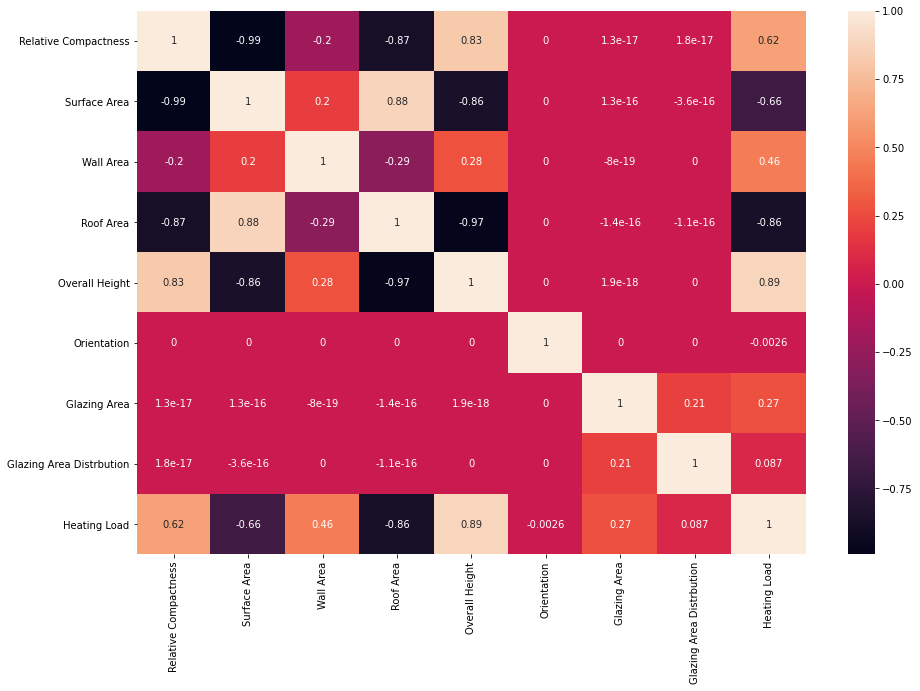

In [ ]:
plt.figure(1,figsize=(15,10))
sns.heatmap(corrh,annot= True)
plt.show()

correlation matrix on cooling load

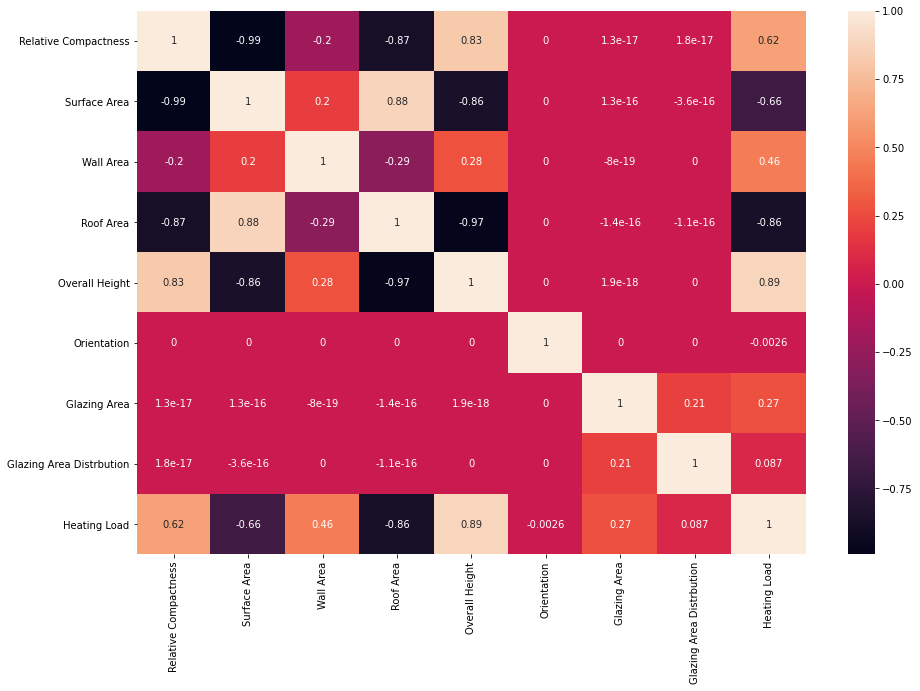

In [ ]:
plt.figure(1,figsize=(15,10))
sns.heatmap(corrh,annot= True)
plt.show()

In [ ]:
dfH = df.iloc[:,[0,1,2,3,4,-2]]
dfC = df.iloc[:,[0,1,2,3,4,-1]]

Heating Load Appropriate independent features

In [ ]:
dfH.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Heating Load
0,0.98,514.5,294.0,110.25,7.0,15.55
1,0.98,514.5,294.0,110.25,7.0,15.55
2,0.98,514.5,294.0,110.25,7.0,15.55
3,0.98,514.5,294.0,110.25,7.0,15.55
4,0.90,563.5,318.5,122.50,7.0,20.84


In [ ]:
xh = dfH.iloc[:,:-1]
yh = dfH.iloc[:,-1]

Train test split on Heating  load

In [ ]:
xh_train,xh_test,yh_train,yh_test = train_test_split(xh,yh,test_size=0.25)

In [ ]:
xh_train.head(3)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height
748,0.71,710.5,269.5,220.5,3.5
305,0.79,637.0,343.0,147.0,7.0
539,0.86,588.0,294.0,147.0,7.0


In [ ]:
yh_test.head(3)

407    36.52
158    24.17
661    15.18
Name: Heating Load, dtype: float64

In [ ]:
hcmlr = LinearRegression()

In [ ]:
hcmlr.fit(xh_train,yh_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Score of model with appropriate feature

In [ ]:
w=hcmlr.score(xh_train,yh_train)*100

y=hcmlr.score(xh_test,yh_test)*100

print('training score of heating model : ',w,'%')

print('testing score of  heating model : ',y,'%')


training score of heating model :  85.27168903490772 %
testing score of  heating model :  80.916648013777 %


slope and intercept of appropriate features of Heating load

In [ ]:
print('the coefficient of heating load on appropriate feature: ', hcmlr.coef_)
print('the intercept of heating load on appropriate feature: ',hcmlr.intercept_)

the coefficient of heating load on appropriate feature:  [-5.90389569e+01 -3.76669369e+11  3.76669369e+11  7.53338738e+11
  4.03096342e+00]
the intercept of heating load on appropriate feature:  83.50206763980732


In [ ]:
yh_pred = hcmlr.predict(xh_test)

Regression metrics score on heating load

In [ ]:
MAE = mean_absolute_error(yh_test,yh_pred)
MSE = mean_squared_error(yh_test,yh_pred)
RMSE = (MSE)**0.5
print('mean absolute error for Heating load on appropriate feature: ',MAE)
print('mean square error for Heating load appropriate feature: ',MSE)
print('mean root square error for Heating load appropriate feature: ',RMSE)

mean absolute error for Heating load on appropriate feature:  3.2639770740521095
mean square error for Heating load appropriate feature:  19.662238908305152
mean root square error for Heating load appropriate feature:  4.434212321067311


In [ ]:
dfH['predicted heating load'] = hcmlr.predict(xh)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfH['Pred_Heating_load_eq'] = df['Relative Compactness']*hcmlr.coef_[0] + df['Surface Area']*hcmlr.coef_[1] + df['Wall Area']*hcmlr.coef_[2] + df['Roof Area']*hcmlr.coef_[3] + df['Overall Height']*hcmlr.coef_[4] + hcmlr.intercept_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfH

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Heating Load,predicted heating load,Pred_Heating_load_eq
0,0.98,514.5,294.0,110.25,7.0,15.55,28.523072,28.515687
1,0.98,514.5,294.0,110.25,7.0,15.55,28.523072,28.515687
2,0.98,514.5,294.0,110.25,7.0,15.55,28.523072,28.515687
3,0.98,514.5,294.0,110.25,7.0,15.55,28.523072,28.515687
4,0.90,563.5,318.5,122.50,7.0,20.84,30.615906,30.609437
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,17.88,14.593960,14.579190
764,0.62,808.5,367.5,220.50,3.5,16.54,15.250210,15.266690
765,0.62,808.5,367.5,220.50,3.5,16.44,15.250210,15.266690
766,0.62,808.5,367.5,220.50,3.5,16.48,15.250210,15.266690


Dataset related upon the appropriate independent Features on Heating  load

Cooling Load Appropriate independent features

In [ ]:
dfC

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,21.33
1,0.98,514.5,294.0,110.25,7.0,21.33
2,0.98,514.5,294.0,110.25,7.0,21.33
3,0.98,514.5,294.0,110.25,7.0,21.33
4,0.90,563.5,318.5,122.50,7.0,28.28
...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,21.40
764,0.62,808.5,367.5,220.50,3.5,16.88
765,0.62,808.5,367.5,220.50,3.5,17.11
766,0.62,808.5,367.5,220.50,3.5,16.61


In [ ]:
xc = dfC.iloc[:,:-1]
yc = dfC.iloc[:,-1]

In [ ]:
yc

0      29.224126
1      29.224126
2      29.224126
3      29.224126
4      31.808598
         ...    
763    17.448565
764    17.886065
765    17.886065
766    17.886065
767    17.886065
Name: predicted cooling load, Length: 768, dtype: float64

Train test split on cooling load

In [ ]:
xc_train,xc_test,yc_train,yc_test = train_test_split(xc,yc,test_size=0.25)

In [ ]:
xc_train

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Cooling Load
451,0.79,637.0,343.0,147.0,7.0,37.26
685,0.82,612.5,318.5,147.0,7.0,32.35
38,0.66,759.5,318.5,220.5,3.5,12.40
244,0.90,563.5,318.5,122.5,7.0,29.82
550,0.76,661.5,416.5,122.5,7.0,40.63
...,...,...,...,...,...,...
298,0.86,588.0,294.0,147.0,7.0,30.12
341,0.90,563.5,318.5,122.5,7.0,32.64
440,0.86,588.0,294.0,147.0,7.0,29.45
516,0.66,759.5,318.5,220.5,3.5,15.83


In [ ]:
yc_test

699    17.32
471    16.14
240    25.64
754    16.54
577    33.13
       ...  
338    30.18
604    16.77
420    15.53
32     11.74
544    45.29
Name: Cooling Load, Length: 192, dtype: float64

In [ ]:
ccmlr = LinearRegression()
ccmlr.fit(xc_train,yc_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Score of model with appropriate feature

In [ ]:
x=ccmlr.score(xc_train,yc_train)*100
z=ccmlr.score(xc_test,yc_test)*100
print('training score of cooling model : ',b,'%')
print('testing score of cooling model : ',z,'%')

training score of cooling model :  89.41044036076846 %
testing score of cooling model :  99.99973521183331 %


slope and intercept of appropriate features of cooling load

In [ ]:
print('the coefficient of Cooling load on appropriate feature: ', ccmlr.coef_)
print('the intercept of Cooling load on appropriate feature: ',ccmlr.intercept_)

In [ ]:
yc_pred = ccmlr.predict(xc_test)

Regressioon metrics on cooling load

In [ ]:
MAE = mean_absolute_error(yc_test,yc_pred)
MSE = mean_squared_error(yc_test,yc_pred)
RMSE = (MSE)**0.5
print('mean absolute error for cooling load on appropriate feature: ',MAE)
print('mean square error for cooling load appropriate feature: ',MSE)
print('mean root square error for cooling load appropriate feature: ',RMSE)

mean absolute error for cooling load on appropriate feature:  2.8534632390194012
mean square error for cooling load appropriate feature:  13.577015997103587
mean root square error for cooling load appropriate feature:  3.68470025878681


In [ ]:
dfC['predicted cooling load'] = ccmlr.predict(xc)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfC['Pred_Cooling_load_eq'] = df['Relative Compactness']*ccmlr.coef_[0] + df['Surface Area']*ccmlr.coef_[1] + df['Wall Area']*ccmlr.coef_[2] + df['Roof Area']*ccmlr.coef_[3] + df['Overall Height']*ccmlr.coef_[4] + ccmlr.intercept_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfC

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Cooling Load,predicted cooling load,Pred_Cooling_load_eq
0,0.98,514.5,294.0,110.25,7.0,21.33,29.202033,29.151093
1,0.98,514.5,294.0,110.25,7.0,21.33,29.202033,29.151093
2,0.98,514.5,294.0,110.25,7.0,21.33,29.202033,29.151093
3,0.98,514.5,294.0,110.25,7.0,21.33,29.202033,29.151093
4,0.90,563.5,318.5,122.50,7.0,28.28,31.789170,31.722138
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,21.40,17.445645,17.394691
764,0.62,808.5,367.5,220.50,3.5,16.88,17.911972,17.871742
765,0.62,808.5,367.5,220.50,3.5,17.11,17.912518,17.871742
766,0.62,808.5,367.5,220.50,3.5,16.61,17.911332,17.871742


Dataset related upon the cooling load of apropriate feature

In [ ]:
############################################   END  ######################################